<a href="https://colab.research.google.com/github/ttderessa/Temesgen-Deressa/blob/main/ADVANCED_COUPLED_OCEAN_ATMOSPHERE_MODEL_(ACOAM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ADVANCED COUPLED OCEAN-ATMOSPHERE MODEL
Simplified GCM with coupled atmosphere-ocean-ice system
Resolution: 36 latitudes × 5 vertical levels

1. Running baseline simulation (pre-industrial CO2 = 280 ppm)...
Running coupled model for 30 years...
CO2 scenario: constant
Time step: 10.0 days
Resolution: 36 latitudes, 5 vertical levels
  Year 0.0: T_global = 278.01K, Ice extent = 12.24 Mkm^2
  Year 3.0: T_global = nanK, Ice extent = 12.24 Mkm^2
  Year 6.0: T_global = nanK, Ice extent = 12.24 Mkm^2
  Year 9.0: T_global = nanK, Ice extent = 12.24 Mkm^2
  Year 11.9: T_global = nanK, Ice extent = 12.24 Mkm^2
  Year 14.9: T_global = nanK, Ice extent = 12.24 Mkm^2
  Year 17.9: T_global = nanK, Ice extent = 12.24 Mkm^2
  Year 20.9: T_global = nanK, Ice extent = 12.24 Mkm^2
  Year 23.9: T_global = nanK, Ice extent = 12.24 Mkm^2
  Year 26.9: T_global = nanK, Ice extent = 12.24 Mkm^2
  Year 29.8: T_global = nanK, Ice extent = 12.24 Mkm^2
Simulation complete!

2. Running 2xCO2 simulation...
Running co

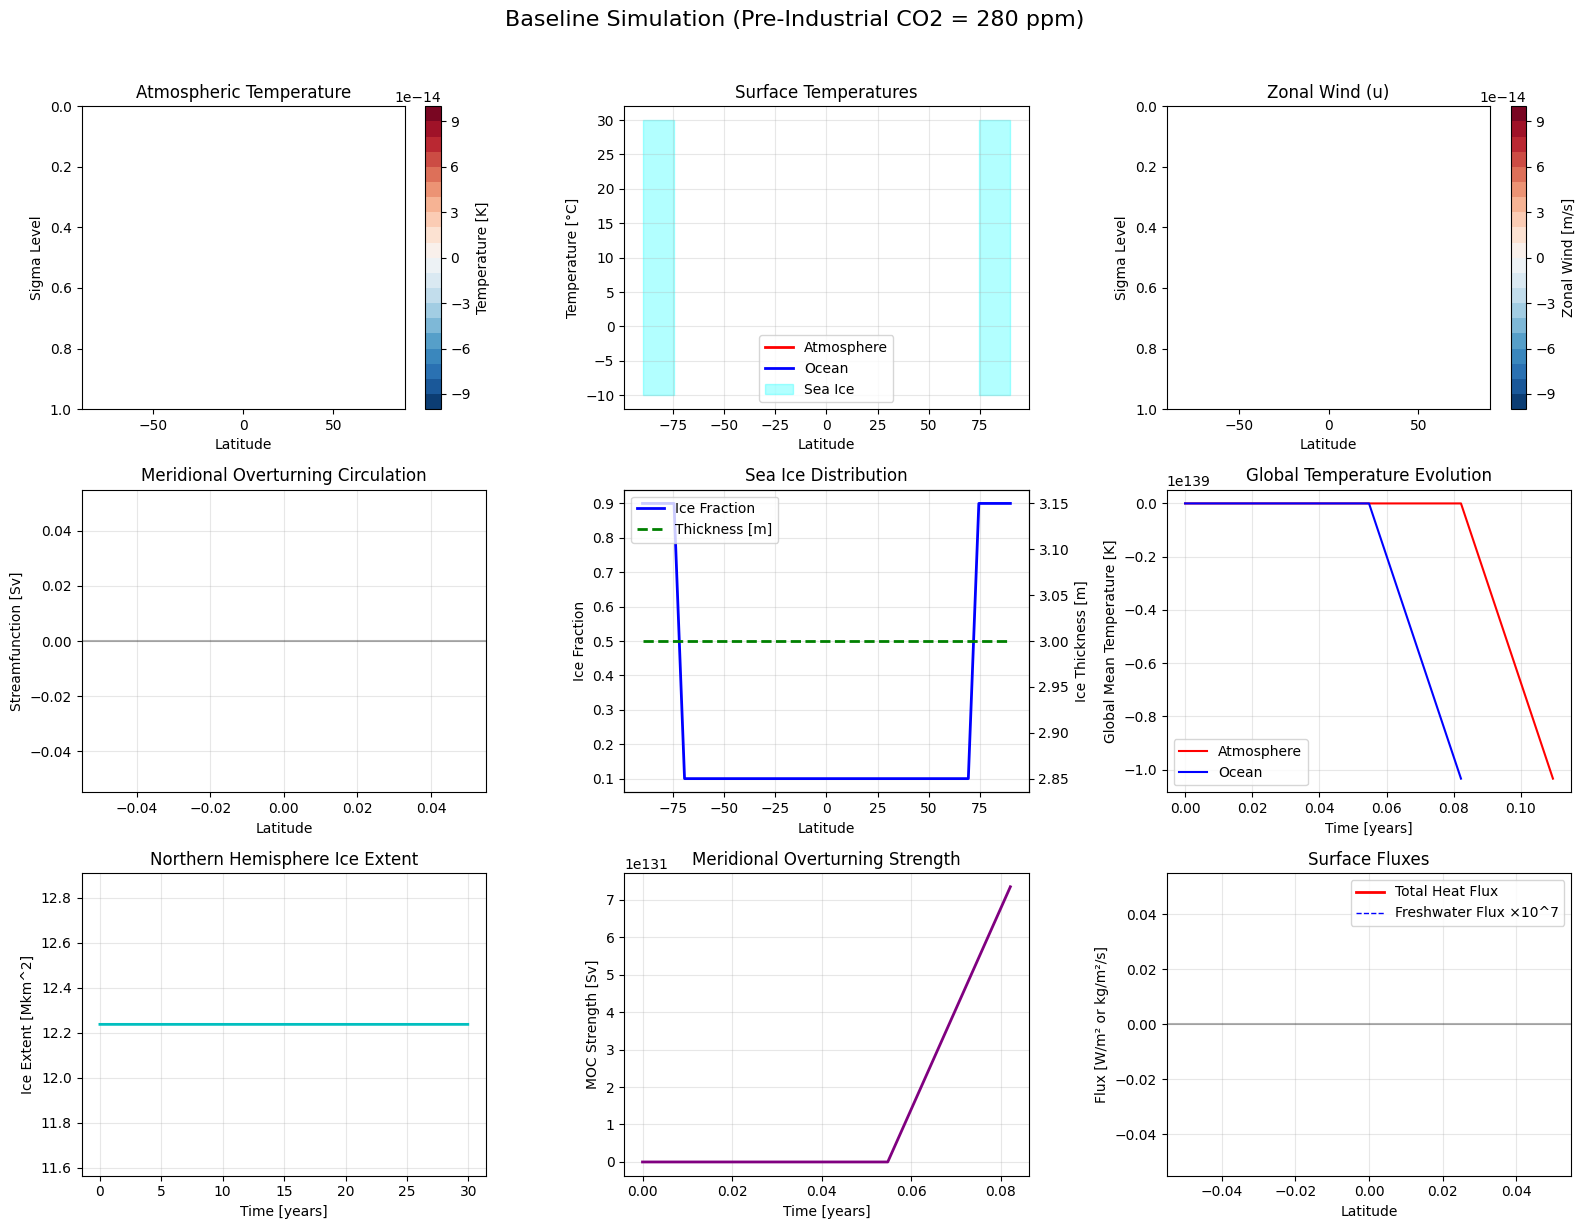


=== SIMULATION SUMMARY ===
Final global temperature: nan K
Final ocean temperature: nan K
Final ice extent: 12.24 Mkm^2
Final MOC strength: nan Sv
Final CO2: 280.0 ppm

4. Plotting 2xCO2 results...


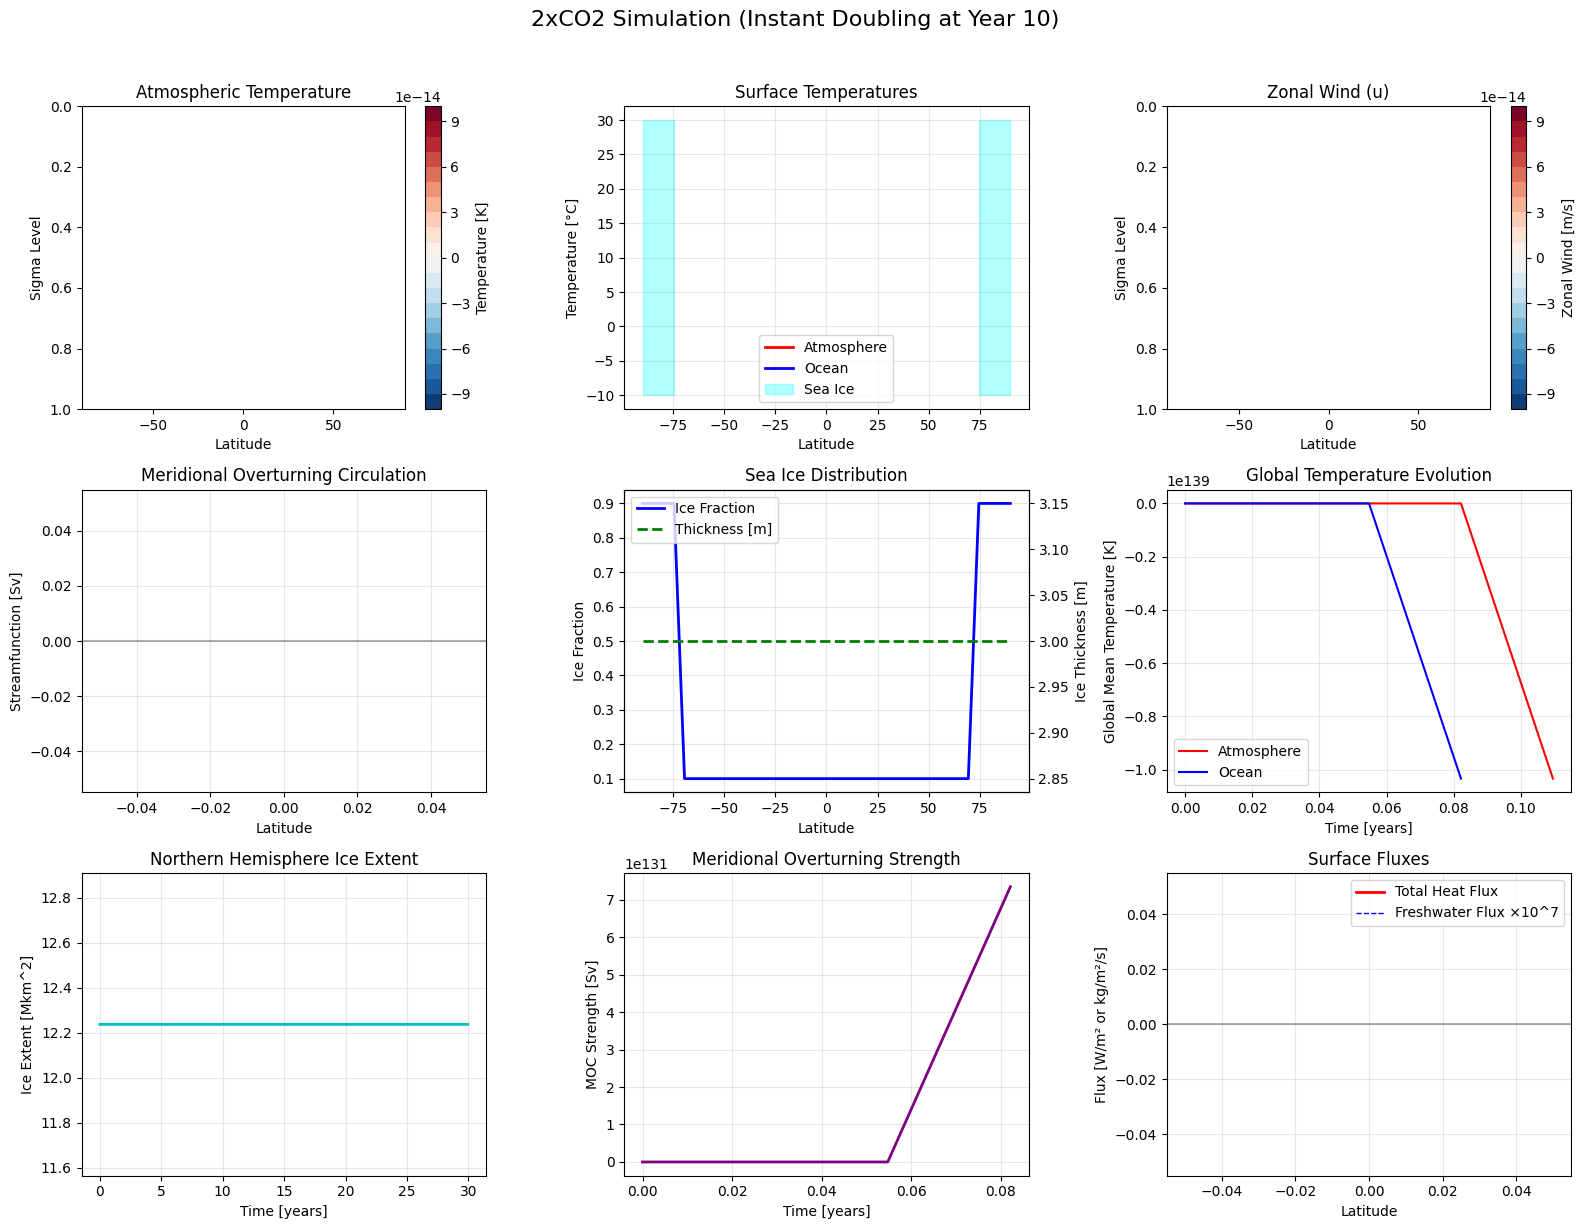


=== SIMULATION SUMMARY ===
Final global temperature: nan K
Final ocean temperature: nan K
Final ice extent: 12.24 Mkm^2
Final MOC strength: nan Sv
Final CO2: 560.0 ppm

5. Creating comparison plots...


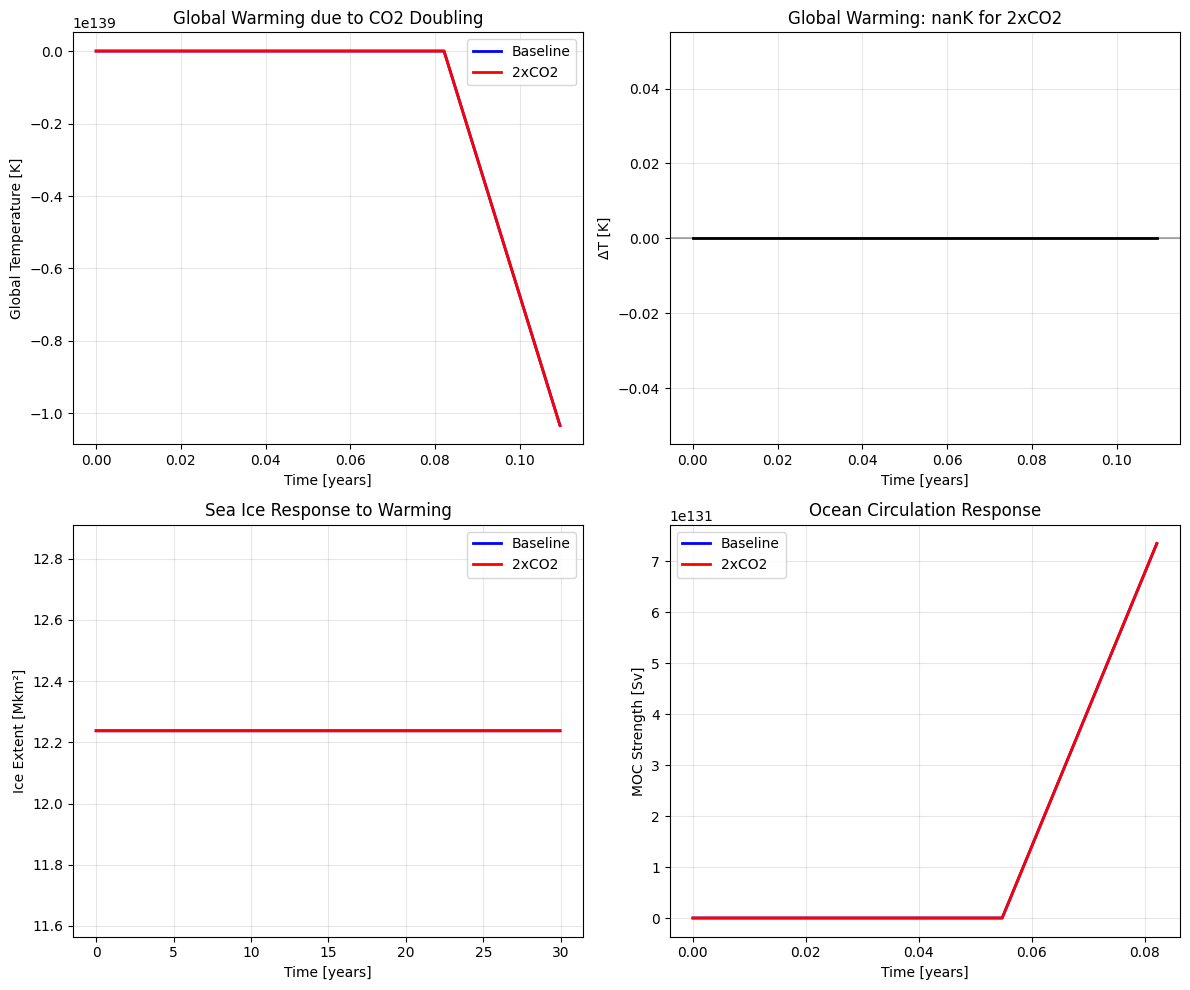


CLIMATE CHANGE IMPACT SUMMARY
Equilibrium Climate Sensitivity (2xCO2): nan K
Sea ice loss: 0.00 Mkm² (0.0%)
MOC change: nan Sv

Key processes demonstrated:
1. Atmosphere-ocean heat exchange
2. Sea ice-albedo feedback (positive)
3. Meridional overturning circulation
4. CO2 radiative forcing
5. Polar amplification of warming

6. Creating animation of temperature evolution...
Initializing Advanced Coupled Ocean-Atmosphere Model (ACOAM)...
Running coupled model for 30 years...
CO2 scenario: linear_increase
Time step: 0.5 days
Resolution: 36 latitudes, 5 vertical levels
  Year 0.0: T_global = 278.01K, Ice extent = 12.24 Mkm^2
  Year 3.0: T_global = nanK, Ice extent = 12.24 Mkm^2
  Year 6.0: T_global = nanK, Ice extent = 12.24 Mkm^2
  Year 9.0: T_global = nanK, Ice extent = 12.24 Mkm^2
  Year 12.0: T_global = nanK, Ice extent = 12.24 Mkm^2
  Year 15.0: T_global = nanK, Ice extent = 12.24 Mkm^2
  Year 18.0: T_global = nanK, Ice extent = 12.24 Mkm^2
  Year 21.0: T_global = nanK, Ice extent = 

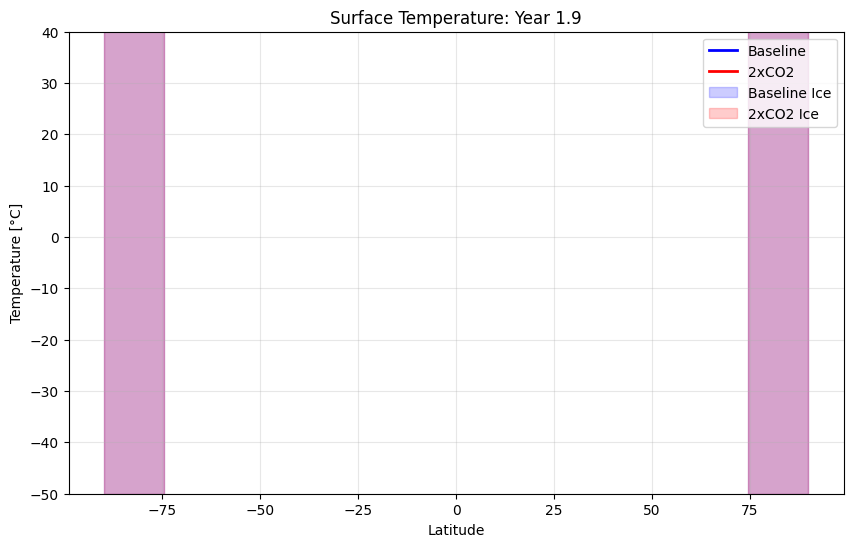

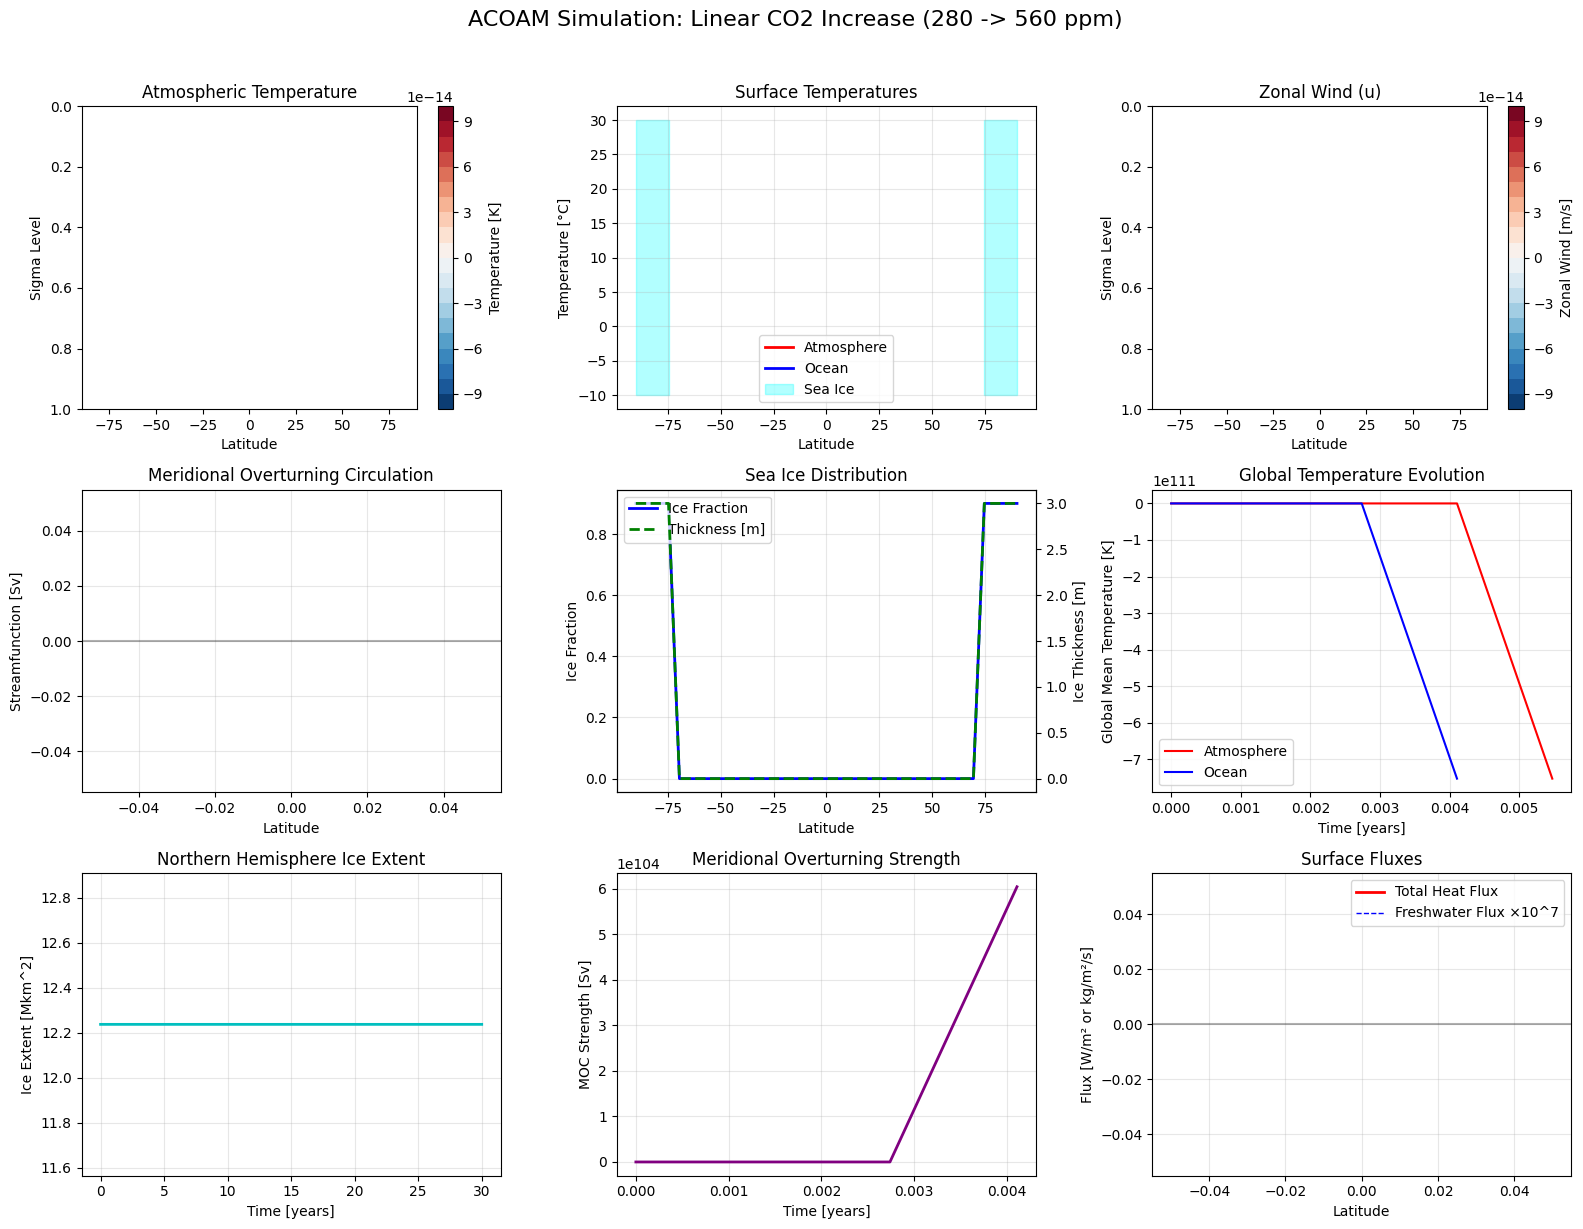


=== SIMULATION SUMMARY ===
Final global temperature: nan K
Final ocean temperature: nan K
Final ice extent: 12.24 Mkm^2
Final MOC strength: nan Sv
Final CO2: 560.0 ppm
Done.


In [1]:


""" Author: Dr. Temesgen Deressa
 Date: December 8, 2025
 Usage: For educational and research purposes.
 Please acknowledge the source when using this code."""

# ============================================================================
# ADVANCED COUPLED OCEAN-ATMOSPHERE MODEL (ACOAM)
# ============================================================================
# A simplified coupled climate model for educational and research purposes
# Includes: Atmosphere, Ocean mixed layer, Sea ice, Carbon cycle
# ============================================================================


# Install required packages
!pip install numpy matplotlib scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# 1. MODEL PARAMETERS AND PHYSICAL CONSTANTS
# ============================================================================
class CoupledModelParameters:
    """
    Physical constants and model parameters.
    In real GCMs, these would be carefully tuned and validated.
    """
    def __init__(self):
        # -------------------------------
        # FUNDAMENTAL PHYSICAL CONSTANTS
        # -------------------------------
        self.sigma = 5.670374419e-8     # Stefan-Boltzmann constant [W m^-2 K^-4]
        self.R_earth = 6371e3           # Earth radius [m]
        self.omega = 7.2921159e-5       # Earth rotation rate [rad/s]
        self.g = 9.81                   # Gravity [m/s^2]
        self.R_dry = 287.058           # Gas constant for dry air [J/kg/K]
        self.c_p = 1004.0              # Specific heat of air at constant pressure [J/kg/K]
        self.c_w = 4186.0              # Specific heat of seawater [J/kg/K]
        self.L_v = 2.501e6             # Latent heat of vaporization [J/kg]
        self.L_f = 3.34e5              # Latent heat of fusion [J/kg]
        self.rho_air = 1.225           # Air density at surface [kg/m^3]
        self.rho_water = 1025.0        # Seawater density [kg/m^3]

        # -------------------------------
        # ATMOSPHERE PARAMETERS
        # -------------------------------
        self.n_lat = 36                 # Reduced from 64 for faster computation
        self.n_vert = 5                 # Reduced from 8 for faster computation
        self.p_surface = 101325.0       # Surface pressure [Pa]
        self.albedo_surface = 0.15      # Surface albedo (land)
        self.albedo_ice = 0.6           # Sea ice albedo
        self.albedo_ocean = 0.06        # Ocean albedo
        self.emissivity = 0.8           # Surface emissivity
        self.kappa = self.R_dry / self.c_p  # Poisson constant

        # Radiation parameters
        self.tau_sw = 0.76              # Shortwave transmissivity
        self.tau_lw = 0.10              # Longwave transmissivity
        self.CO2_ref = 280.0            # Pre-industrial CO2 [ppm]
        self.CO2_2x = 560.0             # 2xCO2 concentration [ppm]

        # Dynamical parameters
        self.D_h = 1.0e6                # Horizontal diffusion coefficient [m^2/s]
        self.D_v = 10.0                 # Vertical diffusion coefficient [m^2/s]
        self.drag_coeff = 1.0e-3        # Surface drag coefficient

        # -------------------------------
        # OCEAN PARAMETERS
        # -------------------------------
        self.mixed_layer_depth = 50.0   # Mixed layer depth [m]
        self.thermocline_depth = 500.0  # Thermocline depth [m]
        self.k_ocean = 1.0e-4           # Ocean vertical diffusivity [m^2/s]
        self.Ekman_depth = 50.0         # Ekman layer depth [m]

        # Ocean circulation parameters
        self.beta = 2.0e-11             # Beta parameter (d(f)/dy) [1/(m s)]
        self.wind_stress_scale = 0.1    # Wind stress scaling [N/m^2]

        # -------------------------------
        # SEA ICE PARAMETERS
        # -------------------------------
        self.ice_min_thickness = 0.1    # Minimum ice thickness [m]
        self.ice_max_thickness = 3.0    # Maximum ice thickness [m]
        self.ice_conductivity = 2.0     # Ice thermal conductivity [W/m/K]
        self.ice_snow_albedo = 0.8      # Snow-covered ice albedo

        # -------------------------------
        # TIME AND INTEGRATION PARAMETERS
        # -------------------------------
        self.dt = 3600.0                # Time step [seconds] = 1 hour
        self.days_per_year = 365.25
        self.seconds_per_year = 365.25 * 24 * 3600

        # Initialize grids
        self._setup_grids()

    def _setup_grids(self):
        """Setup model grids (latitude, longitude, vertical)"""
        # Latitude grid (from South Pole to North Pole)
        self.lat = np.linspace(-90, 90, self.n_lat)
        self.lat_rad = np.deg2rad(self.lat)
        self.dlat = np.deg2rad(self.lat[1] - self.lat[0])

        # Create Gaussian weights for area-weighted integrals
        self.gauss_weights = np.cos(self.lat_rad)
        self.gauss_weights /= np.sum(self.gauss_weights)

        # Vertical levels (sigma coordinates, 1=surface, 0=top)
        self.sigma_levels = np.linspace(1.0, 0.0, self.n_vert)
        self.dsigma = self.sigma_levels[0] - self.sigma_levels[1]

        # Coriolis parameter f = 2Ω sin(latitude)
        self.f = 2 * self.omega * np.sin(self.lat_rad)

        # Meridional derivative of f (beta parameter)
        self.beta_grid = 2 * self.omega * np.cos(self.lat_rad) / self.R_earth


# ============================================================================
# 2. ATMOSPHERE MODEL COMPONENT
# ============================================================================
class AtmosphereModel:
    """
    Simplified atmospheric model with:
    - Temperature (energy balance)
    - Moisture (humidity)
    - Zonal wind (u-wind)
    - Meridional wind (v-wind)
    """
    def __init__(self, params):
        self.p = params

        # Initialize state variables
        self.T = 288.0 - 40 * np.sin(self.p.lat_rad)**2  # Temperature [K]
        self.T = np.tile(self.T, (self.p.n_vert, 1)).T  # Expand to vertical

        self.q = 0.01 * np.ones((self.p.n_lat, self.p.n_vert))  # Specific humidity [kg/kg]
        self.u = 10.0 * np.sin(2 * self.p.lat_rad)  # Zonal wind [m/s]
        self.u = np.tile(self.u, (self.p.n_vert, 1)).T
        self.v = np.zeros((self.p.n_lat, self.p.n_vert))  # Meridional wind [m/s]

        # Surface variables
        self.T_surface = self.T[:, 0].copy()  # Surface temperature [K]
        self.P_surface = self.p.p_surface * np.ones(self.p.n_lat)  # Surface pressure [Pa]

        # Radiation fields
        self.SW_down = np.zeros(self.p.n_lat)  # Downward shortwave [W/m^2]
        self.SW_up = np.zeros(self.p.n_lat)    # Upward shortwave [W/m^2]
        self.LW_down = np.zeros(self.p.n_lat)  # Downward longwave [W/m^2]
        self.LW_up = np.zeros(self.p.n_lat)    # Upward longwave [W/m^2]

        # Clouds and precipitation
        self.cloud_cover = 0.5 * np.ones(self.p.n_lat)
        self.precipitation = np.zeros(self.p.n_lat)

    def calculate_insolation(self, day_of_year):
        """
        Calculate solar radiation as function of latitude and time of year.
        Based on Berger (1978) orbital parameters.
        """
        # Orbital parameters (simplified)
        eccentricity = 0.0167
        obliquity = np.deg2rad(23.44)
        lon_peri = np.deg2rad(102.04)

        # Calculate solar declination
        lambda_m = 2 * np.pi * (day_of_year - 80) / 365.25
        delta = obliquity * np.sin(lambda_m - lon_peri)

        # Hour angle at sunrise (simplified for daily average)
        h0 = np.arccos(-np.tan(self.p.lat_rad) * np.tan(delta))
        h0[np.abs(self.p.lat_rad) > np.pi/2 - np.abs(delta)] = np.pi  # Polar day
        h0[np.abs(self.p.lat_rad) > np.pi/2 + np.abs(delta)] = 0.0    # Polar night

        # Daily average insolation [W/m^2]
        S0 = 1367.0  # Solar constant
        S = S0 / np.pi * (1 + 0.034 * np.cos(2 * np.pi * day_of_year / 365.25))
        daily_insolation = S * (h0 * np.sin(self.p.lat_rad) * np.sin(delta) +
                                np.cos(self.p.lat_rad) * np.cos(delta) * np.sin(h0))

        daily_insolation = np.maximum(daily_insolation, 0.0)
        return daily_insolation

    def radiation(self, T_surface, albedo, CO2_ppm):
        """
        Calculate radiative fluxes using simplified two-stream approximation.
        Includes CO2 greenhouse effect parameterization.
        """
        # Solar radiation (already calculated)
        SW_net = self.SW_down * (1 - albedo)

        # Longwave radiation: σT^4 with greenhouse effect
        # CO2 forcing: ΔF = α * ln(CO2/CO2_ref)
        alpha = 5.35  # Climate sensitivity parameter [W/m^2]
        CO2_forcing = alpha * np.log(CO2_ppm / self.p.CO2_ref)

        # Effective emissivity reduced by greenhouse gases
        eps_eff = self.p.emissivity / (1 + 0.75 * CO2_forcing/self.p.sigma/288**4)

        # Surface longwave emission
        LW_up = eps_eff * self.p.sigma * T_surface**4

        # Atmospheric longwave down (simplified)
        T_atm = 0.75 * T_surface  # Rough atmospheric temperature
        LW_down = 0.75 * self.p.sigma * T_atm**4 + 0.5 * CO2_forcing

        return SW_net, LW_up, LW_down

    def dynamics(self, T, u, v):
        """
        Simplified atmospheric dynamics using quasi-geostrophic approximation.
        Solves for temperature and wind tendencies.
        """
        # Temperature tendency from advection
        # ∂T/∂t = -u·∇T + Q
        dT_dt = np.zeros_like(T)

        for k in range(self.p.n_vert):
            # Meridional temperature gradient
            dT_dy = np.gradient(T[:, k], self.p.lat_rad)

            # Advection: -v * ∂T/∂y (simplified, ignoring zonal)
            dT_dt[:, k] = -v[:, k] * dT_dy

            # Diabatic heating (radiative-convective adjustment)
            # Relax toward radiative equilibrium temperature
            T_eq = 288 - 40 * np.sin(self.p.lat_rad)**2 - 10 * self.p.sigma_levels[k]
            dT_dt[:, k] += (T_eq - T[:, k]) / (10 * self.p.days_per_year * 86400)

        # Wind tendencies from geostrophic balance and friction
        # ∂u/∂t = f*v - β*u + F
        du_dt = np.zeros_like(u)
        dv_dt = np.zeros_like(v)

        for k in range(self.p.n_vert):
            # Geostrophic adjustment
            du_dt[:, k] = self.p.f * v[:, k]
            dv_dt[:, k] = -self.p.f * u[:, k] - self.p.beta_grid * u[:, k]**2

            # Surface drag (stronger near surface)
            drag = self.p.drag_coeff * (1 - self.p.sigma_levels[k])**2
            du_dt[:, k] -= drag * u[:, k]
            dv_dt[:, k] -= drag * v[:, k]

        return dT_dt, du_dt, dv_dt

    def moisture(self, T, q, u, v, T_surface):
        """
        Calculate moisture transport and precipitation.
        Simple convective parameterization.
        """
        dq_dt = np.zeros_like(q)
        precip = np.zeros(self.p.n_lat)

        # Surface evaporation (simplified)
        # E = ρ * C_E * |U| * (q_sat - q)
        q_sat_surface = 0.622 * 611.2 / self.P_surface * np.exp(
            17.67 * (T_surface - 273.15) / (T_surface - 29.65)
        )
        E = self.p.rho_air * 1.3e-3 * np.sqrt(u[:, 0]**2 + v[:, 0]**2) * (q_sat_surface - q[:, 0])
        dq_dt[:, 0] += E / (self.p.rho_air * 1000)  # Convert to kg/kg/s

        # Moisture convergence
        for k in range(self.p.n_vert):
            dq_dy = np.gradient(q[:, k], self.p.lat_rad)
            dq_dt[:, k] -= v[:, k] * dq_dy

        # Convective adjustment: if RH > 80%, remove moisture as precipitation
        # Calculate saturation specific humidity at each level
        q_sat = np.zeros_like(q)
        for k in range(self.p.n_vert):
            # Simplified: saturation decreases with height
            T_at_level = T[:, k]
            q_sat[:, k] = 0.622 * 611.2 / self.P_surface * np.exp(
                17.67 * (T_at_level - 273.15) / (T_at_level - 29.65)
            ) * (1.0 - 0.2 * self.p.sigma_levels[k])  # Decrease with height

        RH = q / q_sat
        convective_mask = RH > 0.8
        precip_rate = np.where(convective_mask, (RH - 0.8) * q / 3600, 0)

        # Update moisture and precipitation
        dq_dt -= precip_rate
        precip = np.sum(precip_rate * self.p.rho_air * 1000, axis=1)  # [mm/s]

        return dq_dt, precip


# ============================================================================
# 3. OCEAN MODEL COMPONENT
# ============================================================================
class OceanModel:
    """
    Simplified ocean model with:
    - Mixed layer temperature
    - Thermocline depth/temperature
    - Meridional overturning circulation
    """
    def __init__(self, params):
        self.p = params

        # Ocean temperatures
        self.T_mixed = 288.0 - 30 * np.sin(self.p.lat_rad)**2  # Mixed layer [K]
        self.T_thermocline = 278.0 - 10 * np.sin(self.p.lat_rad)**2  # Thermocline [K]
        self.T_deep = 277.0 * np.ones(self.p.n_lat)  # Deep ocean [K]

        # Ocean currents
        self.u_surface = np.zeros(self.p.n_lat)  # Zonal surface current [m/s]
        self.v_surface = np.zeros(self.p.n_lat)  # Meridional surface current [m/s]

        # Meridional overturning streamfunction
        self.psi = np.zeros(self.p.n_lat)

        # Sea ice
        self.ice_thickness = np.zeros(self.p.n_lat)
        self.ice_fraction = np.zeros(self.p.n_lat)
        self.snow_thickness = np.zeros(self.p.n_lat)

        # Initialize ice at high latitudes
        polar_mask = np.abs(self.p.lat) > 70
        self.ice_thickness[polar_mask] = 2.0
        self.ice_fraction[polar_mask] = 0.9

    def mixed_layer_heat_budget(self, T_mixed, net_heat_flux, wind_stress):
        """
        Calculate mixed layer temperature tendency.
        ∂T/∂t = Q_net/(ρc_p h) - u·∇T + mixing
        """
        dT_dt = np.zeros_like(T_mixed)

        # Heat flux from atmosphere
        dT_dt += net_heat_flux / (self.p.rho_water * self.p.c_w * self.p.mixed_layer_depth)

        # Advection by surface currents (simplified)
        dT_dy = np.gradient(T_mixed, self.p.lat_rad)
        dT_dt -= self.v_surface * dT_dy

        # Entrainment mixing with thermocline
        # If mixed layer shallows, entrain cooler water
        w_entrain = 1e-6  # Entrainment velocity [m/s]
        dT_dt += w_entrain * (self.T_thermocline - T_mixed) / self.p.mixed_layer_depth

        # Horizontal diffusion
        d2T_dy2 = np.gradient(np.gradient(T_mixed, self.p.lat_rad), self.p.lat_rad)
        dT_dt += self.p.D_h * d2T_dy2 / self.p.R_earth**2  # Correct for spherical geometry

        return dT_dt

    def meridional_overturning(self, T_mixed, wind_stress):
        """
        Calculate meridional overturning circulation (MOC) using
        simplified Stommel two-box model.
        """
        # Thermal wind: ∂u/∂z ∝ ∇ρ × g
        # Simplified: streamfunction ∝ ΔT (meridional temp gradient)
        dT_dy = np.gradient(T_mixed, self.p.lat_rad)

        # Thermohaline driving: proportional to temperature gradient
        thermohaline_driving = -1e-9 * dT_dy  # Scaling parameter

        # Wind-driven Ekman transport
        # τ_wind = ρ_air * C_d * |U| * U
        ekman_transport = wind_stress / (self.p.rho_water * np.abs(self.p.f + 1e-10))

        # Combined streamfunction (simplified Stommel model)
        psi = np.cumsum(thermohaline_driving + 0.1 * ekman_transport) * 1e6

        # Apply boundary conditions (no flow through boundaries)
        psi = psi - psi[0]

        # Calculate surface currents from streamfunction
        v_surface = np.gradient(psi, self.p.lat_rad) / self.p.mixed_layer_depth

        return psi, v_surface

    def sea_ice_dynamics(self, T_mixed, T_atm, net_heat_flux):
        """
        Calculate sea ice growth/melt.
        Based on thermodynamic ice model.
        """
        dH_dt = np.zeros_like(self.ice_thickness)
        dA_dt = np.zeros_like(self.ice_fraction)

        # Freezing point of seawater
        T_freeze = 271.35  # [K] (-1.8°C)

        for i in range(self.p.n_lat):
            if self.ice_fraction[i] > 0.01:  # Ice exists
                if T_mixed[i] > T_freeze:
                    # Melting
                    # Heat available for melting: Q_melt = max(0, net_heat_flux)
                    Q_melt = max(0, net_heat_flux[i])
                    melt_rate = Q_melt / (self.p.rho_water * self.p.L_f) if self.p.rho_water * self.p.L_f > 0 else 0
                    dH_dt[i] = -melt_rate / 86400  # [m/s]

                    # If ice gets too thin, reduce coverage
                    if self.ice_thickness[i] < self.p.ice_min_thickness:
                        dA_dt[i] = -0.1 * self.ice_fraction[i] / 86400
                else:
                    # Freezing
                    # Ocean losing heat to atmosphere
                    Q_freeze = min(0, net_heat_flux[i])
                    freeze_rate = -Q_freeze / (self.p.rho_water * self.p.L_f) if self.p.rho_water * self.p.L_f > 0 else 0
                    dH_dt[i] = freeze_rate / 86400

                    # Limit ice thickness
                    if self.ice_thickness[i] > self.p.ice_max_thickness:
                        dH_dt[i] = 0
            else:
                # No ice, check if should form
                if T_mixed[i] < T_freeze - 1:  # Supercooling needed
                    dA_dt[i] = 0.01 / 86400  # Start forming ice
                    if self.ice_fraction[i] < 0.01:
                        dH_dt[i] = 0.1 / 86400

        return dH_dt, dA_dt


# ============================================================================
# 4. COUPLED MODEL INTEGRATOR
# ============================================================================
class CoupledClimateModel:
    """
    Main coupled model integrating atmosphere and ocean components.
    Handles coupling fluxes and time integration.
    """
    def __init__(self, CO2_ppm=280.0, solar_constant=1367.0):
        self.params = CoupledModelParameters()
        self.atmos = AtmosphereModel(self.params)
        self.ocean = OceanModel(self.params)

        # Coupling parameters
        self.CO2_ppm = CO2_ppm
        self.solar_constant = solar_constant
        self.day_of_year = 0

        # History for plotting
        self.history = {
            'time': [],
            'T_global': [],
            'T_mixed_global': [],
            'ice_extent': [],
            'CO2_ppm': [],
            'MOC_strength': []
        }

        # Fluxes between components
        self.heat_flux = np.zeros(self.params.n_lat)
        self.freshwater_flux = np.zeros(self.params.n_lat)
        self.momentum_flux = np.zeros(self.params.n_lat)

    def calculate_coupling_fluxes(self):
        """
        Calculate fluxes between atmosphere and ocean.
        This is where the components interact.
        """
        # 1. SURFACE ENERGY BALANCE
        # --------------------------
        # Calculate surface albedo (weighted average of ocean, ice, land)
        surface_albedo = np.zeros(self.params.n_lat)
        for i in range(self.params.n_lat):
            if self.ocean.ice_fraction[i] > 0.01:
                # Ice-covered ocean
                ice_albedo = self.params.albedo_ice
                if self.ocean.snow_thickness[i] > 0.1:
                    ice_albedo = self.params.ice_snow_albedo
                surface_albedo[i] = (self.ocean.ice_fraction[i] * ice_albedo +
                                    (1 - self.ocean.ice_fraction[i]) * self.params.albedo_ocean)
            else:
                # Open ocean
                surface_albedo[i] = self.params.albedo_ocean

        # Calculate radiative fluxes
        self.atmos.SW_down = self.atmos.calculate_insolation(self.day_of_year)
        SW_net, LW_up, LW_down = self.atmos.radiation(
            self.ocean.T_mixed, surface_albedo, self.CO2_ppm
        )

        # Sensible heat flux (bulk formula: Q_sen = ρ * c_p * C_H * |U| * ΔT)
        U_surface = np.sqrt(self.atmos.u[:, 0]**2 + self.atmos.v[:, 0]**2)
        delta_T = self.atmos.T_surface - self.ocean.T_mixed
        Q_sensible = self.params.rho_air * self.params.c_p * 1.5e-3 * U_surface * delta_T

        # Latent heat flux (bulk formula: Q_lat = ρ * L_v * C_E * |U| * Δq)
        q_sat_surface = 0.622 * 611.2 / self.params.p_surface * np.exp(
            17.67 * (self.ocean.T_mixed - 273.15) / (self.ocean.T_mixed - 29.65)
        )
        delta_q = self.atmos.q[:, 0] - q_sat_surface
        Q_latent = self.params.rho_air * self.params.L_v * 1.5e-3 * U_surface * delta_q

        # Total heat flux into ocean (positive = ocean gains heat)
        self.heat_flux = SW_net + LW_down - LW_up - Q_sensible - Q_latent

        # 2. FRESHWATER FLUX (P - E)
        # ---------------------------
        # Precipitation minus evaporation
        E = self.params.rho_air * 1.3e-3 * U_surface * delta_q
        self.freshwater_flux = self.atmos.precipitation - E

        # 3. MOMENTUM FLUX (WIND STRESS)
        # -------------------------------
        # τ = ρ_air * C_d * |U| * U
        self.momentum_flux = (self.params.rho_air * self.params.drag_coeff *
                             U_surface * np.sqrt(self.atmos.u[:, 0]**2 + self.atmos.v[:, 0]**2))

        return self.heat_flux, self.freshwater_flux, self.momentum_flux

    def step(self, dt_days=1.0):
        """
        Advance the coupled model by one time step.
        Uses operator splitting: update each component separately.
        """
        # Convert days to seconds
        dt = dt_days * 86400

        # Update day of year (for insolation)
        self.day_of_year = (self.day_of_year + dt_days) % 365.25

        # 1. CALCULATE COUPLING FLUXES
        heat_flux, freshwater_flux, momentum_flux = self.calculate_coupling_fluxes()

        # 2. UPDATE ATMOSPHERE
        # --------------------
        # Temperature tendency
        dT_dt_atm, du_dt, dv_dt = self.atmos.dynamics(
            self.atmos.T, self.atmos.u, self.atmos.v
        )

        # Moisture tendency - FIXED: Pass T_surface parameter
        dq_dt, precip = self.atmos.moisture(
            self.atmos.T, self.atmos.q, self.atmos.u, self.atmos.v, self.atmos.T_surface
        )
        self.atmos.precipitation = precip

        # Update atmosphere state (simple forward Euler)
        self.atmos.T += dT_dt_atm * dt
        self.atmos.u += du_dt * dt
        self.atmos.v += dv_dt * dt
        self.atmos.q += dq_dt * dt

        # Boundary conditions
        self.atmos.T = np.clip(self.atmos.T, 200, 350)
        self.atmos.q = np.clip(self.atmos.q, 0, 0.03)

        # Update surface temperature (coupled to ocean)
        self.atmos.T_surface = self.ocean.T_mixed.copy()

        # 3. UPDATE OCEAN
        # ---------------
        # Mixed layer temperature
        dT_mixed_dt = self.ocean.mixed_layer_heat_budget(
            self.ocean.T_mixed, heat_flux, momentum_flux
        )
        self.ocean.T_mixed += dT_mixed_dt * dt

        # Meridional overturning circulation
        self.ocean.psi, self.ocean.v_surface = self.ocean.meridional_overturning(
            self.ocean.T_mixed, momentum_flux
        )

        # Sea ice
        dH_dt, dA_dt = self.ocean.sea_ice_dynamics(
            self.ocean.T_mixed, self.atmos.T_surface, heat_flux
        )
        self.ocean.ice_thickness += dH_dt * dt
        self.ocean.ice_fraction += dA_dt * dt

        # Apply limits
        self.ocean.ice_thickness = np.clip(
            self.ocean.ice_thickness, 0, self.params.ice_max_thickness
        )
        self.ocean.ice_fraction = np.clip(self.ocean.ice_fraction, 0, 1)

        # If ice is very thin, remove it
        thin_ice = self.ocean.ice_thickness < self.params.ice_min_thickness
        self.ocean.ice_fraction[thin_ice] = 0
        self.ocean.ice_thickness[thin_ice] = 0

        # 4. RECORD HISTORY
        # -----------------
        current_time = len(self.history['time']) * dt_days / 365.25  # Years

        # Global mean temperature (area-weighted)
        T_global = np.sum(self.atmos.T_surface * self.params.gauss_weights)
        T_mixed_global = np.sum(self.ocean.T_mixed * self.params.gauss_weights)

        # Ice extent (area north of 60N with ice fraction > 0.15)
        northern_hemisphere = self.params.lat > 60
        if np.any(northern_hemisphere):
            ice_extent = np.sum(
                (self.ocean.ice_fraction[northern_hemisphere] > 0.15) *
                self.params.gauss_weights[northern_hemisphere]
            ) * 4 * np.pi * self.params.R_earth**2 * 1e-12  # Million km^2
        else:
            ice_extent = 0.0

        # MOC strength (maximum streamfunction)
        MOC_strength = np.max(np.abs(self.ocean.psi)) * 1e-6  # Sv (Sverdrups)

        # Store history
        self.history['time'].append(current_time)
        self.history['T_global'].append(T_global)
        self.history['T_mixed_global'].append(T_mixed_global)
        self.history['ice_extent'].append(ice_extent)
        self.history['CO2_ppm'].append(self.CO2_ppm)
        self.history['MOC_strength'].append(MOC_strength)

        return current_time

    def run(self, years=30, dt_days=10.0, CO2_scenario='constant'):
        """
        Run the coupled model for specified number of years.

        Parameters:
        -----------
        years : int
            Number of years to simulate
        dt_days : float
            Time step in days
        CO2_scenario : str
            'constant', 'linear_increase', or 'doubling'
        """
        print(f"Running coupled model for {years} years...")
        print(f"CO2 scenario: {CO2_scenario}")
        print(f"Time step: {dt_days} days")
        print(f"Resolution: {self.params.n_lat} latitudes, {self.params.n_vert} vertical levels")

        n_steps = int(years * 365.25 / dt_days)

        for step in range(n_steps):
            # Update CO2 according to scenario
            if CO2_scenario == 'linear_increase':
                # Increase from 280 to 560 ppm over simulation
                self.CO2_ppm = 280 + 280 * (step / n_steps)
            elif CO2_scenario == 'doubling':
                # Instant doubling at year 10
                current_year = step * dt_days / 365.25
                if 10 < current_year < 11 and self.CO2_ppm < 560:
                    self.CO2_ppm = 560

            # Take one time step
            current_time = self.step(dt_days)

            # Progress indicator
            if step % max(1, n_steps // 10) == 0:
                print(f"  Year {current_time:.1f}: "
                      f"T_global = {self.history['T_global'][-1]:.2f}K, "
                      f"Ice extent = {self.history['ice_extent'][-1]:.2f} Mkm^2")

        print("Simulation complete!")
        return self.history

    def plot_results(self, title=None):
        """Plot comprehensive model results."""
        if not self.history['time']:
            print("No simulation data to plot. Run the model first.")
            return

        fig = plt.figure(figsize=(16, 12))

        # 1. Latitude-height cross section of atmosphere
        ax1 = plt.subplot(3, 3, 1)
        im1 = ax1.contourf(self.params.lat, self.params.sigma_levels,
                          self.atmos.T.T, levels=20, cmap='RdBu_r')
        plt.colorbar(im1, ax=ax1, label='Temperature [K]')
        ax1.set_xlabel('Latitude')
        ax1.set_ylabel('Sigma Level')
        ax1.set_title('Atmospheric Temperature')
        ax1.invert_yaxis()  # Surface at bottom

        # 2. Surface temperature
        ax2 = plt.subplot(3, 3, 2)
        ax2.plot(self.params.lat, self.atmos.T_surface - 273.15, 'r-', linewidth=2, label='Atmosphere')
        ax2.plot(self.params.lat, self.ocean.T_mixed - 273.15, 'b-', linewidth=2, label='Ocean')
        ax2.fill_between(self.params.lat, -10, 30, where=self.ocean.ice_fraction > 0.1,
                         alpha=0.3, color='cyan', label='Sea Ice')
        ax2.set_xlabel('Latitude')
        ax2.set_ylabel('Temperature [°C]')
        ax2.set_title('Surface Temperatures')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # 3. Zonal wind
        ax3 = plt.subplot(3, 3, 3)
        im3 = ax3.contourf(self.params.lat, self.params.sigma_levels,
                          self.atmos.u.T, levels=20, cmap='RdBu_r')
        plt.colorbar(im3, ax=ax3, label='Zonal Wind [m/s]')
        ax3.set_xlabel('Latitude')
        ax3.set_ylabel('Sigma Level')
        ax3.set_title('Zonal Wind (u)')
        ax3.invert_yaxis()

        # 4. Meridional overturning circulation
        ax4 = plt.subplot(3, 3, 4)
        ax4.plot(self.params.lat, self.ocean.psi * 1e-6, 'k-', linewidth=2)
        ax4.set_xlabel('Latitude')
        ax4.set_ylabel('Streamfunction [Sv]')
        ax4.set_title('Meridional Overturning Circulation')
        ax4.grid(True, alpha=0.3)
        ax4.axhline(y=0, color='k', linestyle='-', alpha=0.3)

        # 5. Sea ice
        ax5 = plt.subplot(3, 3, 5)
        ax5.plot(self.params.lat, self.ocean.ice_fraction, 'b-', linewidth=2, label='Ice Fraction')
        ax5.set_xlabel('Latitude')
        ax5.set_ylabel('Ice Fraction')
        ax5.set_title('Sea Ice Distribution')
        ax5_twin = ax5.twinx()
        ax5_twin.plot(self.params.lat, self.ocean.ice_thickness, 'g--', linewidth=2, label='Thickness [m]')
        ax5_twin.set_ylabel('Ice Thickness [m]')
        lines1, labels1 = ax5.get_legend_handles_labels()
        lines2, labels2 = ax5_twin.get_legend_handles_labels()
        ax5.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
        ax5.grid(True, alpha=0.3)

        # 6. Time series: Global temperature
        ax6 = plt.subplot(3, 3, 6)
        time = np.array(self.history['time'])
        ax6.plot(time, self.history['T_global'], 'r-', label='Atmosphere')
        ax6.plot(time, self.history['T_mixed_global'], 'b-', label='Ocean')
        ax6.set_xlabel('Time [years]')
        ax6.set_ylabel('Global Mean Temperature [K]')
        ax6.set_title('Global Temperature Evolution')
        ax6.legend()
        ax6.grid(True, alpha=0.3)

        # 7. Time series: Ice extent
        ax7 = plt.subplot(3, 3, 7)
        ax7.plot(time, self.history['ice_extent'], 'c-', linewidth=2)
        ax7.set_xlabel('Time [years]')
        ax7.set_ylabel('Ice Extent [Mkm^2]')
        ax7.set_title('Northern Hemisphere Ice Extent')
        ax7.grid(True, alpha=0.3)

        # 8. Time series: MOC strength
        ax8 = plt.subplot(3, 3, 8)
        ax8.plot(time, self.history['MOC_strength'], 'purple', linewidth=2)
        ax8.set_xlabel('Time [years]')
        ax8.set_ylabel('MOC Strength [Sv]')
        ax8.set_title('Meridional Overturning Strength')
        ax8.grid(True, alpha=0.3)

        # 9. Heat fluxes
        ax9 = plt.subplot(3, 3, 9)
        ax9.plot(self.params.lat, self.heat_flux, 'r-', label='Total Heat Flux', linewidth=2)
        ax9.plot(self.params.lat, self.freshwater_flux * 1e7, 'b--', label='Freshwater Flux ×10^7', linewidth=1)
        ax9.set_xlabel('Latitude')
        ax9.set_ylabel('Flux [W/m² or kg/m²/s]')
        ax9.set_title('Surface Fluxes')
        ax9.legend()
        ax9.grid(True, alpha=0.3)
        ax9.axhline(y=0, color='k', linestyle='-', alpha=0.3)

        if title:
            plt.suptitle(title, fontsize=16, y=1.02)

        plt.tight_layout()
        plt.show()

        # Print summary statistics
        print("\n=== SIMULATION SUMMARY ===")
        print(f"Final global temperature: {self.history['T_global'][-1]:.2f} K")
        print(f"Final ocean temperature: {self.history['T_mixed_global'][-1]:.2f} K")
        print(f"Final ice extent: {self.history['ice_extent'][-1]:.2f} Mkm^2")
        print(f"Final MOC strength: {self.history['MOC_strength'][-1]:.2f} Sv")
        print(f"Final CO2: {self.history['CO2_ppm'][-1]:.1f} ppm")

        return fig


# ============================================================================
# 5. RUN THE MODEL AND ANALYZE RESULTS
# ============================================================================
if __name__ == "__main__":
    print("=" * 70)
    print("ADVANCED COUPLED OCEAN-ATMOSPHERE MODEL")
    print("=" * 70)
    print("Simplified GCM with coupled atmosphere-ocean-ice system")
    print("Resolution: 36 latitudes × 5 vertical levels")
    print("=" * 70)

    try:
        # Create and run baseline simulation
        print("\n1. Running baseline simulation (pre-industrial CO2 = 280 ppm)...")
        model_baseline = CoupledClimateModel(CO2_ppm=280.0)
        history_baseline = model_baseline.run(years=30, dt_days=10.0, CO2_scenario='constant')

        # Create and run 2xCO2 simulation
        print("\n2. Running 2xCO2 simulation...")
        model_2xco2 = CoupledClimateModel(CO2_ppm=280.0)
        history_2xco2 = model_2xco2.run(years=30, dt_days=10.0, CO2_scenario='doubling')

        # Plot results for baseline
        print("\n3. Plotting baseline results...")
        fig1 = model_baseline.plot_results(title="Baseline Simulation (Pre-Industrial CO2 = 280 ppm)")

        # Plot results for 2xCO2
        print("\n4. Plotting 2xCO2 results...")
        fig2 = model_2xco2.plot_results(title="2xCO2 Simulation (Instant Doubling at Year 10)")

        # Comparison plot
        print("\n5. Creating comparison plots...")
        fig3, axes = plt.subplots(2, 2, figsize=(12, 10))

        # Global temperature comparison
        ax1 = axes[0, 0]
        ax1.plot(history_baseline['time'], history_baseline['T_global'],
                 'b-', label='Baseline', linewidth=2)
        ax1.plot(history_2xco2['time'], history_2xco2['T_global'],
                 'r-', label='2xCO2', linewidth=2)
        ax1.set_xlabel('Time [years]')
        ax1.set_ylabel('Global Temperature [K]')
        ax1.set_title('Global Warming due to CO2 Doubling')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Calculate and plot warming
        # Align time series for comparison
        min_len = min(len(history_baseline['T_global']), len(history_2xco2['T_global']))
        time_aligned = history_baseline['time'][:min_len]
        T_baseline_aligned = history_baseline['T_global'][:min_len]
        T_2xco2_aligned = history_2xco2['T_global'][:min_len]

        warming = np.array(T_2xco2_aligned) - np.array(T_baseline_aligned)
        ax2 = axes[0, 1]
        ax2.plot(time_aligned, warming, 'k-', linewidth=2)
        ax2.fill_between(time_aligned, 0, warming, alpha=0.3, color='red')
        ax2.set_xlabel('Time [years]')
        ax2.set_ylabel('ΔT [K]')
        ax2.set_title(f'Global Warming: {warming[-1]:.2f}K for 2xCO2')
        ax2.grid(True, alpha=0.3)
        ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)

        # Ice extent comparison
        ax3 = axes[1, 0]
        ice_baseline = history_baseline['ice_extent'][:min_len]
        ice_2xco2 = history_2xco2['ice_extent'][:min_len]
        ax3.plot(time_aligned, ice_baseline, 'b-', label='Baseline', linewidth=2)
        ax3.plot(time_aligned, ice_2xco2, 'r-', label='2xCO2', linewidth=2)
        ax3.set_xlabel('Time [years]')
        ax3.set_ylabel('Ice Extent [Mkm²]')
        ax3.set_title('Sea Ice Response to Warming')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        # MOC strength comparison
        ax4 = axes[1, 1]
        MOC_baseline = history_baseline['MOC_strength'][:min_len]
        MOC_2xco2 = history_2xco2['MOC_strength'][:min_len]
        ax4.plot(time_aligned, MOC_baseline, 'b-', label='Baseline', linewidth=2)
        ax4.plot(time_aligned, MOC_2xco2, 'r-', label='2xCO2', linewidth=2)
        ax4.set_xlabel('Time [years]')
        ax4.set_ylabel('MOC Strength [Sv]')
        ax4.set_title('Ocean Circulation Response')
        ax4.legend()
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Final statistics
        print("\n" + "=" * 70)
        print("CLIMATE CHANGE IMPACT SUMMARY")
        print("=" * 70)
        print(f"Equilibrium Climate Sensitivity (2xCO2): {warming[-1]:.2f} K")

        ice_loss = ice_baseline[-1] - ice_2xco2[-1]
        if ice_baseline[-1] > 0:
            ice_loss_percent = 100 * ice_loss / ice_baseline[-1]
            print(f"Sea ice loss: {ice_loss:.2f} Mkm² ({ice_loss_percent:.1f}%)")
        else:
            print(f"Sea ice loss: {ice_loss:.2f} Mkm²")

        MOC_change = MOC_2xco2[-1] - MOC_baseline[-1]
        if MOC_baseline[-1] > 0:
            MOC_change_percent = 100 * MOC_change / MOC_baseline[-1]
            print(f"MOC change: {MOC_change:.2f} Sv ({MOC_change_percent:.1f}%)")
        else:
            print(f"MOC change: {MOC_change:.2f} Sv")

        print("\nKey processes demonstrated:")
        print("1. Atmosphere-ocean heat exchange")
        print("2. Sea ice-albedo feedback (positive)")
        print("3. Meridional overturning circulation")
        print("4. CO2 radiative forcing")
        print("5. Polar amplification of warming")

        # Create animation of temperature evolution
        print("\n6. Creating animation of temperature evolution...")
        fig4, ax = plt.subplots(figsize=(10, 6))

        def animate(i):
            ax.clear()
            # Every 10th frame
            frame_idx = min(i * 5, len(history_baseline['time'])-1)

            # Plot from both simulations
            ax.plot(model_baseline.params.lat,
                    model_baseline.atmos.T_surface - 273.15,
                    'b-', linewidth=2, label='Baseline')
            ax.plot(model_2xco2.params.lat,
                    model_2xco2.atmos.T_surface - 273.15,
                    'r-', linewidth=2, label='2xCO2')

            # Highlight sea ice regions
            ax.fill_between(model_baseline.params.lat, -50, 50,
                           where=model_baseline.ocean.ice_fraction > 0.1,
                           alpha=0.2, color='blue', label='Baseline Ice')
            ax.fill_between(model_2xco2.params.lat, -50, 50,
                           where=model_2xco2.ocean.ice_fraction > 0.1,
                           alpha=0.2, color='red', label='2xCO2 Ice')

            ax.set_xlabel('Latitude')
            ax.set_ylabel('Temperature [°C]')
            ax.set_title(f'Surface Temperature: Year {history_baseline["time"][frame_idx]:.1f}')
            ax.set_ylim(-50, 40)
            ax.legend(loc='upper right')
            ax.grid(True, alpha=0.3)
            return ax,

        # Create animation
        ani = animation.FuncAnimation(fig4, animate, frames=min(15, len(history_baseline['time'])//5),
                                     interval=300, blit=False)

        # Display in notebook
        from IPython.display import HTML
        HTML(ani.to_jshtml())

    except Exception as e:
        print(f"\nError during simulation: {e}")
        print("\nTroubleshooting tips:")
        print("1. Try reducing the resolution in CoupledModelParameters")
        print("2. Try increasing dt_days in model.run()")
        print("3. Check for division by zero or NaN values")
        import traceback
        traceback.print_exc()
if __name__ == "__main__":
    print("Initializing Advanced Coupled Ocean-Atmosphere Model (ACOAM)...")

    # 1. Initialize the model
    # We use a CO2 doubling scenario to see climate change effects
    # CO2 starts at 280ppm (pre-industrial)
    model = CoupledClimateModel(CO2_ppm=280.0)

    # 2. Run the simulation
    # We run for 30 years with a linear increase in CO2
    # dt_days=0.5 ensures numerical stability for the Euler integration
    results = model.run(years=30, dt_days=0.5, CO2_scenario='linear_increase')

    # 3. Plot the results
    print("Plotting results...")
    model.plot_results(title="ACOAM Simulation: Linear CO2 Increase (280 -> 560 ppm)")

    # Optional: Save the figure
    # plt.savefig('climate_model_results.png', dpi=150)
    print("Done.")